# 0. Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 1. Data Read In

In [2]:
df = pd.read_csv("../data/interim/labeled_data_CN7.csv", parse_dates=True)
df.set_index("TimeStamp", inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3974 entries, 2020-10-16 04:57:47 to 2020-11-03 08:19:35
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       3974 non-null   object 
 1   PART_FACT_PLAN_DATE       3974 non-null   object 
 2   PART_FACT_SERIAL          3974 non-null   int64  
 3   PART_NAME                 3974 non-null   object 
 4   PassOrFail                3974 non-null   int64  
 5   Reason                    3974 non-null   object 
 6   Injection_Time            3974 non-null   float64
 7   Filling_Time              3974 non-null   float64
 8   Plasticizing_Time         3974 non-null   float64
 9   Cycle_Time                3974 non-null   float64
 10  Clamp_Close_Time          3974 non-null   float64
 11  Cushion_Position          3974 non-null   float64
 12  Switch_Over_Position      3974 non-null   float64
 13  Plasticizing_Position     3974 non-

In [4]:
df.head()

,_id,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-10-16 04:57:47,5f8928bb9c0189cc666ef19b,2020-10-16,24,CN7 W/S SIDE MLD'G RH,0,None,9.59,4.47,16.92,59.520000,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.5
2020-10-16 04:58:48,5f8928de9c0189cc666ef20b,2020-10-16,24,CN7 W/S SIDE MLD'G RH,0,None,9.60,4.48,16.91,59.580002,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2020-10-16 04:58:48,5f8928df9c0189cc666ef213,2020-10-16,23,CN7 W/S SIDE MLD'G LH,0,None,9.60,4.48,16.91,59.580002,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2020-10-16 04:59:48,5f8928f39c0189cc666ef25e,2020-10-16,23,CN7 W/S SIDE MLD'G LH,0,None,9.59,4.48,16.91,59.560001,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
2020-10-16 04:59:48,5f8928f59c0189cc666ef265,2020-10-16,24,CN7 W/S SIDE MLD'G RH,0,None,9.59,4.48,16.91,59.560001,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6


# 2. EDA

## 2.1. Preparation for EDA

In [5]:
# Classification of features
numerical_features = [x for x in df.columns if np.dtype(df[x]) == "float64"]
categorical_features = (
    set(df.columns.tolist())
    - set(numerical_features)
    - set(["_id", "PART_NAME", "PassOrFail", "Reason"])
)

In [6]:
# Separation of data based on pass/fail
pass_df = df.query("PassOrFail == 0")
fail_df = df.query("PassOrFail == 1")

## 2.2. Distribution of Categorical Features

In [7]:
categorical_features

{'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL'}

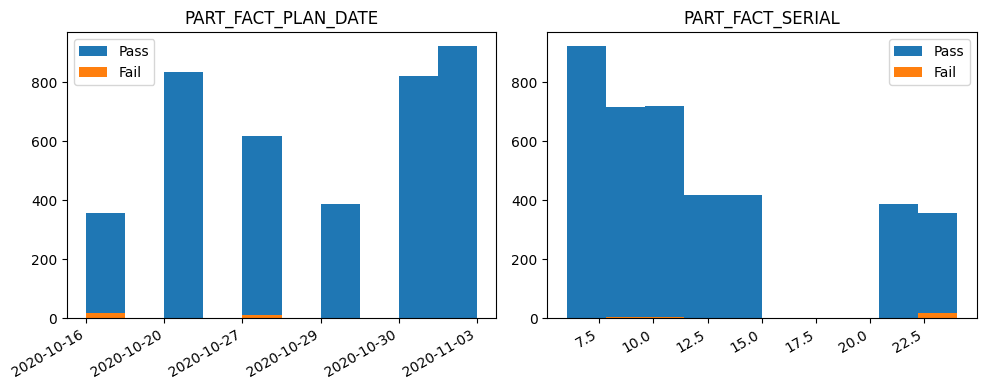

In [8]:
fig, axs = plt.subplots(figsize=(10, 4), ncols=2)

for i, feat in enumerate(categorical_features):
    axs[i].hist(pass_df[f"{feat}"], label="Pass", bins=10)
    axs[i].hist(fail_df[f"{feat}"], label="Fail", bins=10)
    axs[i].set_title(f"{feat}")
    axs[i].legend()
fig.autofmt_xdate()
plt.tight_layout()
plt.show();

- No clear pattern was observed for both `PART_FACT_PLAN_DATE` and `PART_FACT_SERIAL` on the target, `PassOrFail`.

## 2.3. Distribution of Numerical Features

In [9]:
len(numerical_features)

25

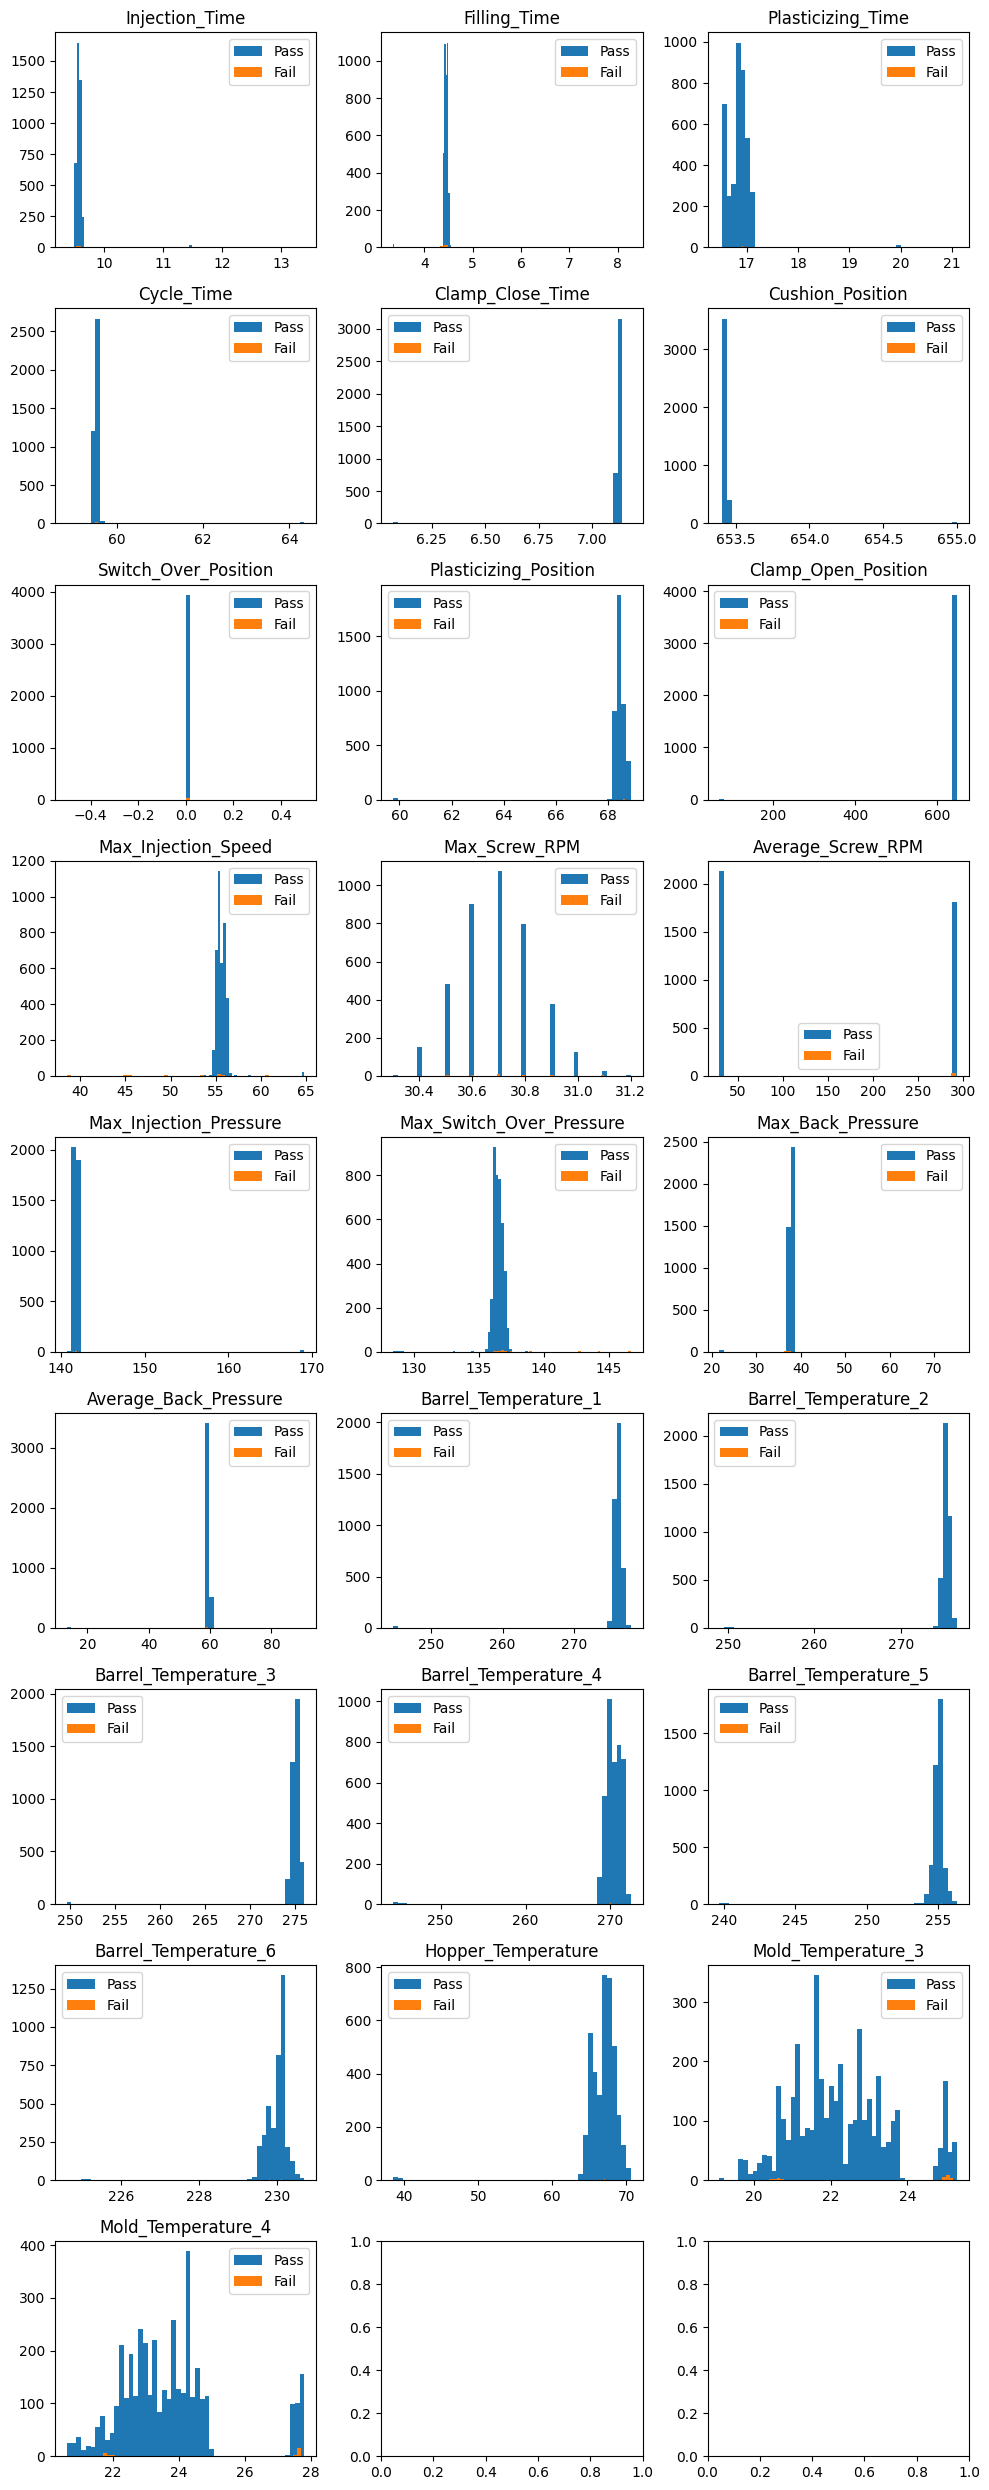

In [10]:
fig, axs = plt.subplots(figsize=(10, 25), nrows=9, ncols=3)

r = 0
c = 0
for i, feat in enumerate(numerical_features):
    axs[r, c].hist(pass_df[f"{feat}"], label="Pass", bins=50)
    axs[r, c].hist(fail_df[f"{feat}"], label="Fail", bins=50)
    axs[r, c].set_title(f"{feat}")
    axs[r, c].legend()
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
plt.tight_layout()
plt.show();

- It was difficult to see how the fail data is distributed

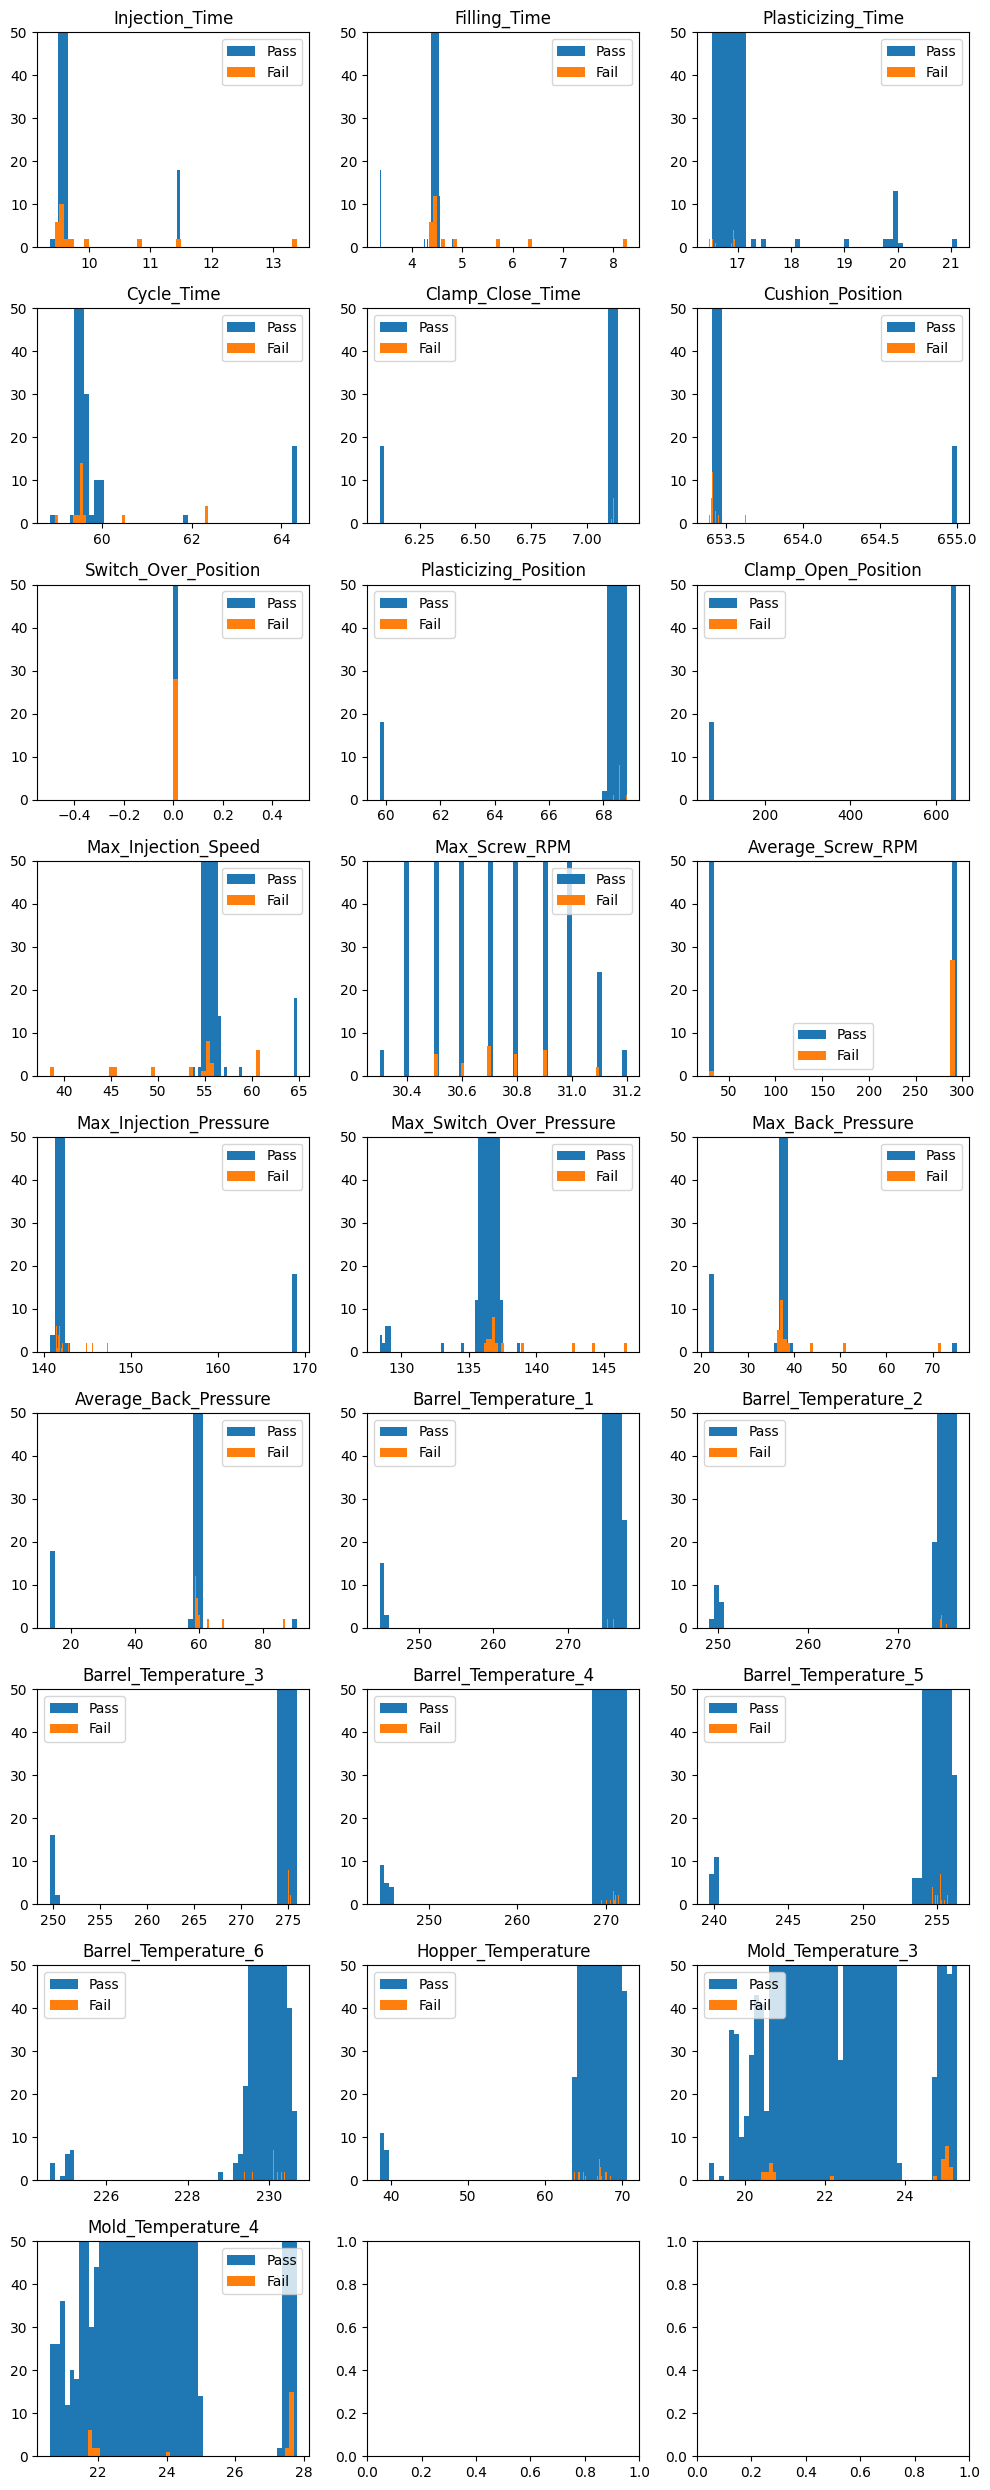

In [11]:
# The range of Y-axis was modified

fig, axs = plt.subplots(figsize=(10, 25), nrows=9, ncols=3)

r = 0
c = 0
for i, feat in enumerate(numerical_features):
    axs[r, c].hist(pass_df[f"{feat}"], label="Pass", bins=50)
    axs[r, c].hist(fail_df[f"{feat}"], label="Fail", bins=50)
    axs[r, c].set_title(f"{feat}")
    axs[r, c].set_ylim(0, 50)
    axs[r, c].legend()
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
plt.tight_layout()
plt.show();

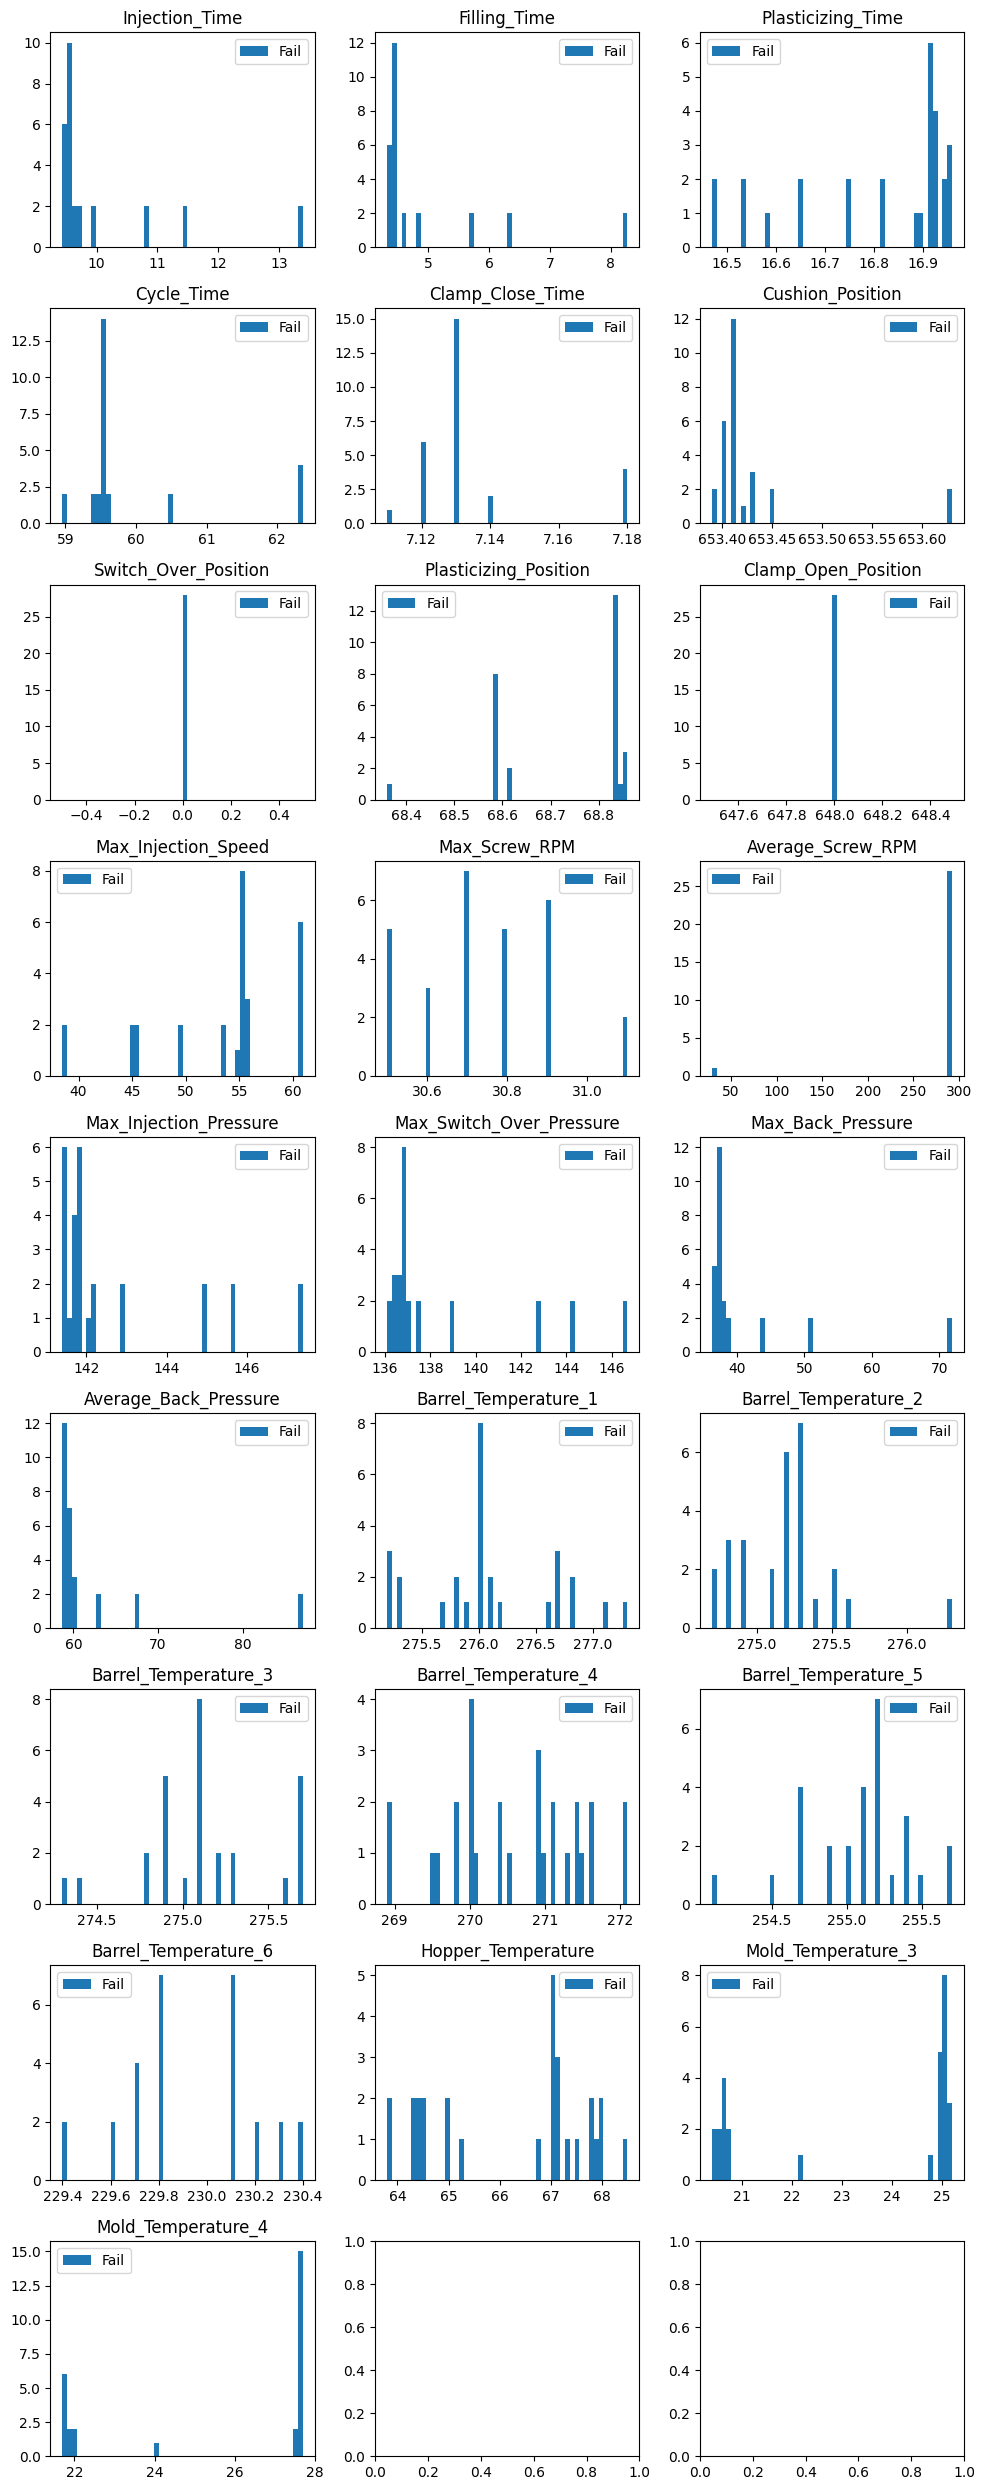

In [12]:
# Fail data only

fig, axs = plt.subplots(figsize=(10, 25), nrows=9, ncols=3)
r = 0
c = 0
for i, feat in enumerate(numerical_features):
    axs[r, c].hist(fail_df[f"{feat}"], label="Fail", bins=50)
    axs[r, c].set_title(f"{feat}")
    axs[r, c].legend()
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
plt.tight_layout()
plt.show();

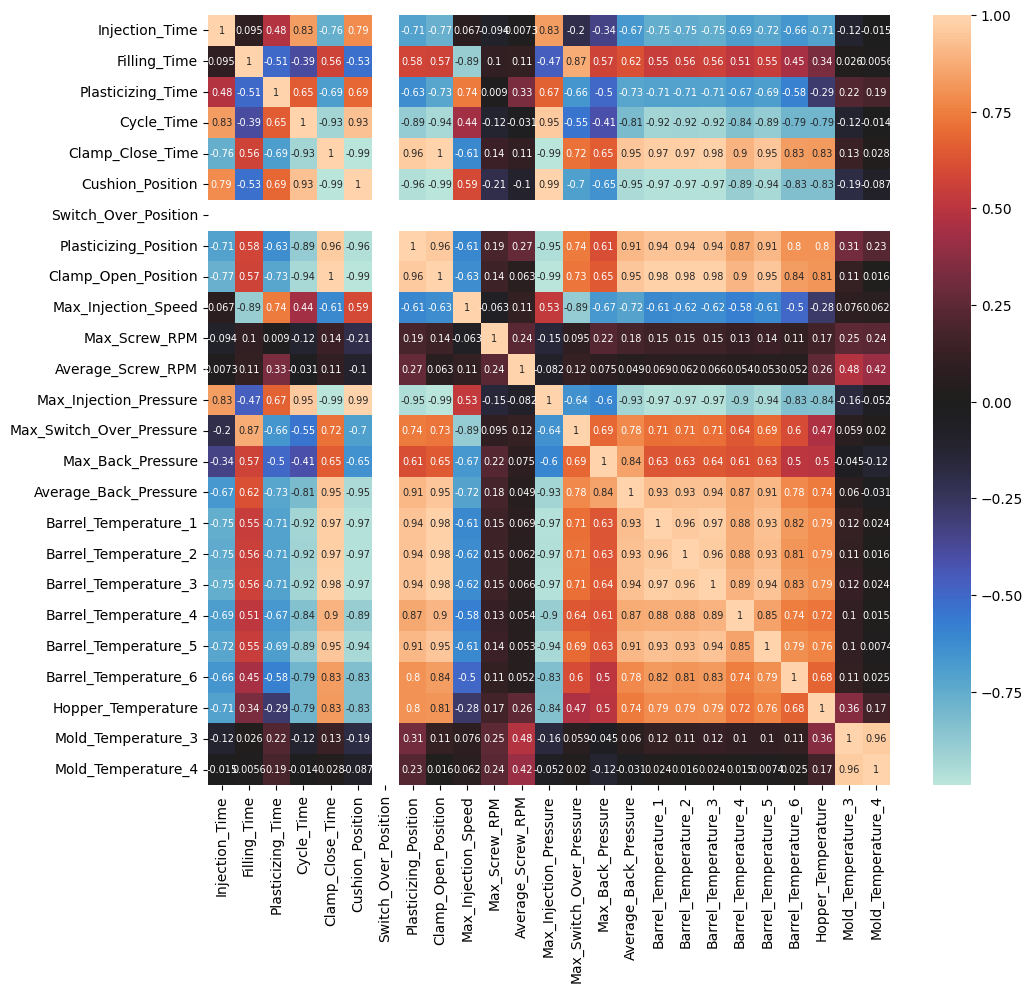

In [13]:
# Multi-collinearity

f, ax = plt.subplots(figsize=(11, 10))

sns.heatmap(
    df[numerical_features].corr(method="pearson"),
    center=0,
    annot=True,
    annot_kws={"size": 7},
);

- In the case of Numerical Features, the effects of `Switch_Over_Position` and `Clamp_Open_Position` seem to be negligible.

# 3. Features Selection

In [14]:
drop_features = (
    list(categorical_features)
    + ["Switch_Over_Position", "Clamp_Open_Position"]
    + ["PART_NAME"]
)

In [15]:
final_columns = set(df.columns.tolist()) - set(drop_features)

In [16]:
df = df[list(final_columns)].copy()

In [17]:
df

,Injection_Time,Plasticizing_Position,Max_Switch_Over_Pressure,Max_Injection_Pressure,Max_Back_Pressure,Cycle_Time,Filling_Time,Max_Injection_Speed,Barrel_Temperature_5,Mold_Temperature_3,...,Reason,Plasticizing_Time,Barrel_Temperature_4,Clamp_Close_Time,Barrel_Temperature_1,PassOrFail,Cushion_Position,Max_Screw_RPM,Barrel_Temperature_2,Average_Screw_RPM
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-10-16 04:57:47,9.59,68.849998,136.800003,141.800003,37.400002,59.520000,4.47,55.400002,255.000000,24.799999,...,None,16.920000,269.200012,7.13,276.500000,0,653.409973,30.700001,274.700012,292.500000
2020-10-16 04:58:48,9.60,68.839996,136.899994,141.800003,37.500000,59.580002,4.48,55.299999,254.699997,24.799999,...,None,16.910000,270.799988,7.13,276.200012,0,653.409973,30.799999,275.500000,292.500000
2020-10-16 04:58:48,9.60,68.839996,136.899994,141.800003,37.500000,59.580002,4.48,55.299999,254.699997,24.799999,...,None,16.910000,270.799988,7.13,276.200012,0,653.409973,30.799999,275.500000,292.500000
2020-10-16 04:59:48,9.59,68.839996,136.800003,141.800003,37.500000,59.560001,4.48,55.299999,254.899994,25.000000,...,None,16.910000,271.100006,7.13,276.500000,0,653.419983,31.000000,275.000000,292.500000
2020-10-16 04:59:48,9.59,68.839996,136.800003,141.800003,37.500000,59.560001,4.48,55.299999,254.899994,25.000000,...,None,16.910000,271.100006,7.13,276.500000,0,653.419983,31.000000,275.000000,292.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03 08:17:36,9.60,68.330002,137.000000,142.100006,38.299999,59.560001,4.48,54.900002,255.600006,21.000000,...,None,16.620001,269.500000,7.11,276.500000,0,653.429993,30.700001,274.899994,29.200001
2020-11-03 08:18:37,9.60,68.349998,136.800003,142.100006,38.400002,59.560001,4.48,55.000000,254.899994,21.000000,...,None,16.650000,270.700012,7.11,275.799988,0,653.429993,30.700001,275.299988,29.200001
2020-11-03 08:18:37,9.60,68.349998,136.800003,142.100006,38.400002,59.560001,4.48,55.000000,254.899994,21.000000,...,None,16.650000,270.700012,7.11,275.799988,0,653.429993,30.700001,275.299988,29.200001


In [18]:
df.to_csv("../data/processed/labeled_data_CN7.csv", index=True)

# 4. Distributions of Selected Features for Pass/Fail Data

In [19]:
# Just to extract the final features for the boxplot

final_features = [
    "Average_Back_Pressure",
    "Average_Screw_RPM",
    "Barrel_Temperature_1",
    "Barrel_Temperature_2",
    "Barrel_Temperature_3",
    "Barrel_Temperature_4",
    "Barrel_Temperature_5",
    "Barrel_Temperature_6",
    "Clamp_Close_Time",
    "Cushion_Position",
    "Cycle_Time",
    "Filling_Time",
    "Hopper_Temperature",
    "Injection_Time",
    "Max_Back_Pressure",
    "Max_Injection_Pressure",
    "Max_Injection_Speed",
    "Max_Screw_RPM",
    "Max_Switch_Over_Pressure",
    "Mold_Temperature_3",
    "Mold_Temperature_4",
    "Plasticizing_Position",
    "Plasticizing_Time",
]

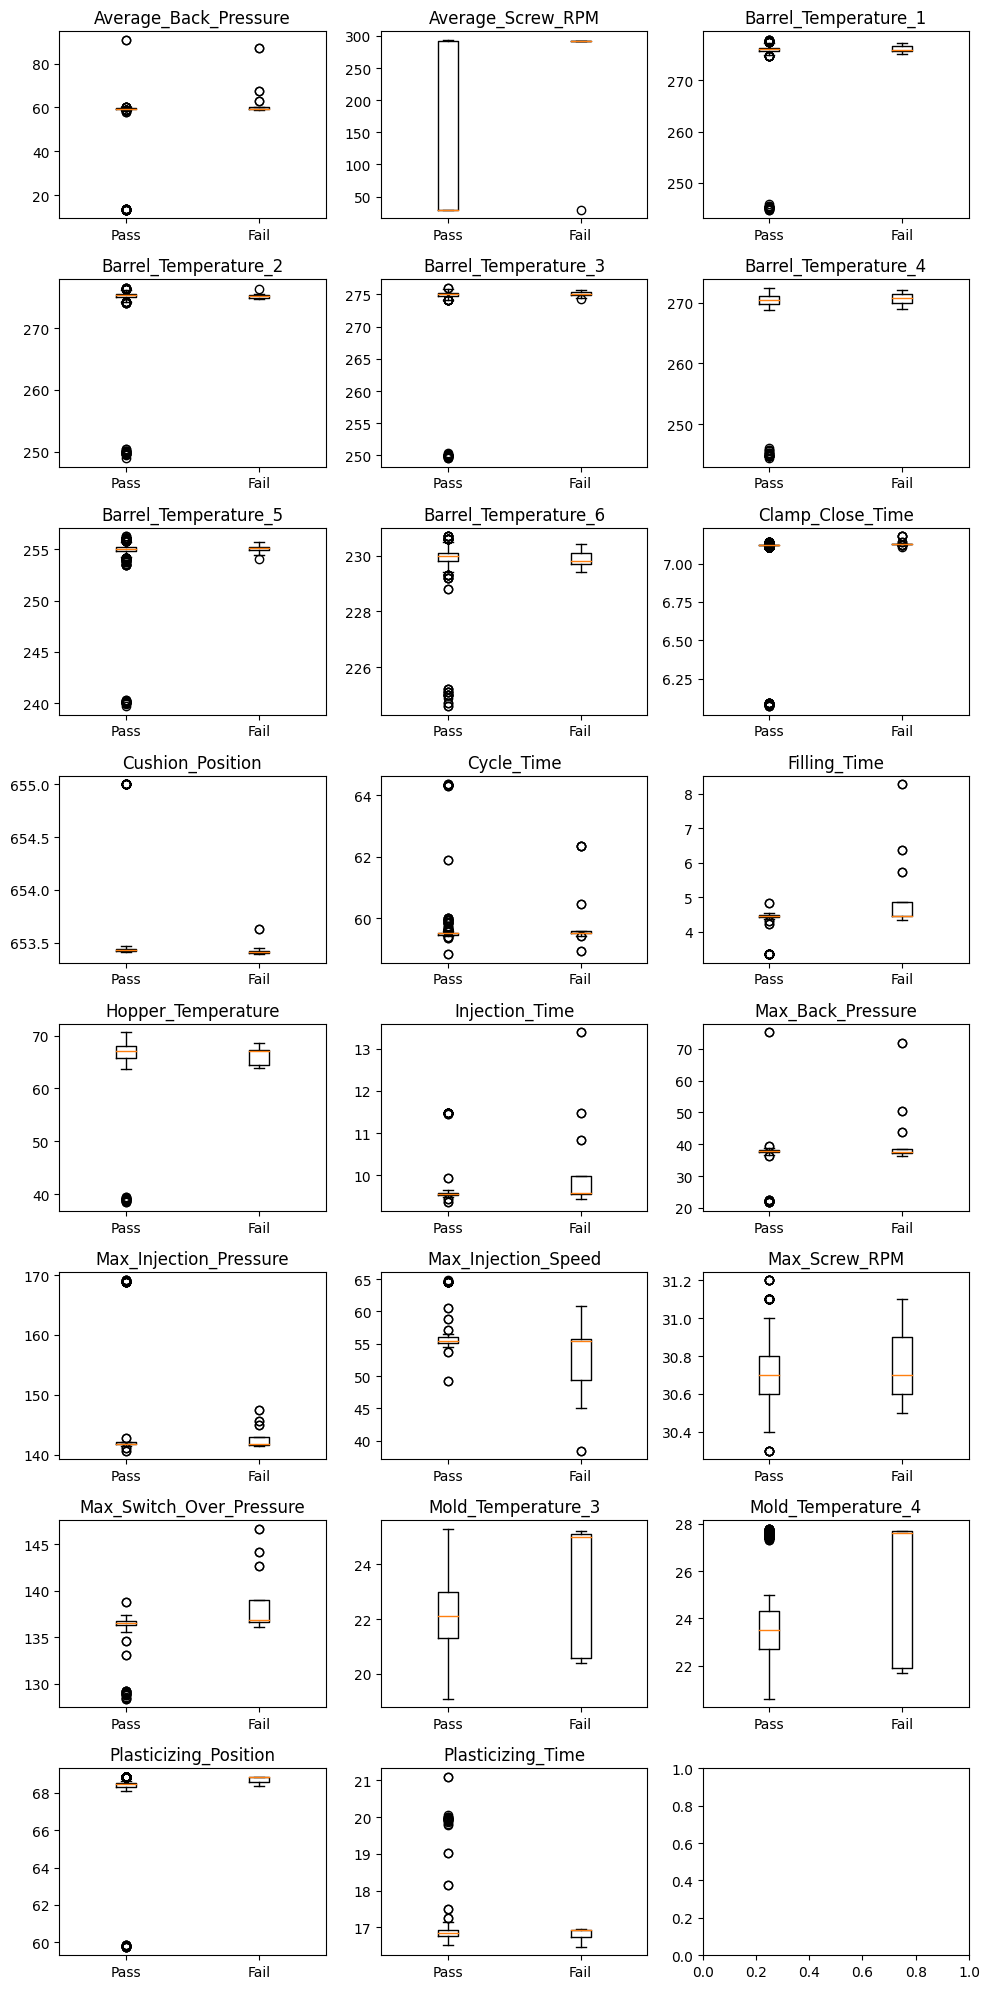

In [20]:
fig, axs = plt.subplots(figsize=(10, 20), nrows=8, ncols=3)

r = 0
c = 0
for i, feat in enumerate(list(final_features)):
    axs[r, c].boxplot(
        [pass_df[f"{feat}"], fail_df[f"{feat}"]],
        # positions=[1, 3],
        labels=["Pass", "Fail"],
    )
    axs[r, c].set_title(f"{feat}")
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
plt.tight_layout()
plt.show();
fig.savefig("../img/cn7_parameter_distribution.png")

- There seems to be difference in features' distributions for Pass/Fail data of `CN7` to a certain degree.